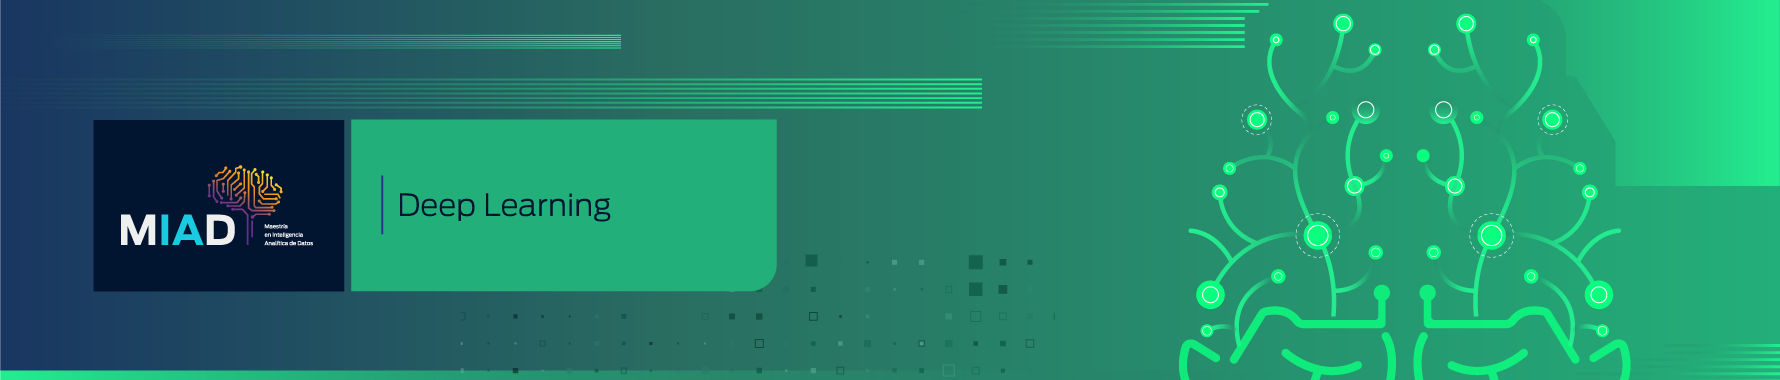

# Estrategias de implementación

## Redes neuronales usando Keras: Implementación en contexto real usando Keras

## Actividad calificada por el personal

### Propósito 

En el laboratorio "Estimación de red neuronal con múltiples capas" se propuso una implementación manual de redes neuronales usando librerías básicas de python como lo son *pandas* y *numpy*. *Google* desarrolló un *API* para el aprendizaje automático cuyo nombre es *"Keras"*, esta es escrita en *python* y es utilizada para hacer implementaciones de redes neuronales simples.

Así, en este *notebook* se pretende evaluar el uso de *keras* al aplicar una red neuronal en un contexto real. 

### Instrucciones generales

1. Para desarrollar el notebook, lo deberán descargar a un repositorio (pueden escoger el repositorio de su preferencia) para que lo puedan trabajar grupalmente.

2. Los procedimientos en el notebook deberán responderse en los espacios especificados para tal fin, debajo de cada uno de los puntos.

3. Para que la actividad sea calificada, deberán subir únicamente este mismo archivo con la extensión ".ipynb" a la actividad de "entrega calificada por el personal" correspondiente a este caso.

4. El archivo que suban debe poder ejecutarse localmente cuando sea descargado por el tutor, asumiendo que la base de datos de la actividad ya ha sido importada en el correspondiente archivo separado por comas (.csv).

### Criterios a evaluar

Los criterios que se evaluarán son:

Análisis preliminar de variables: Se presentan correlogramas, histogramas y estadísticas descriptivas de las variables de la base de datos y se hace un análisis coherente de cada uno de ellos. [30 puntos]

Estimación de un modelo utilizando redes neuronales: Se estima el modelo usando una red neuronal, se evalúa en la muestra de test y se analizan correctamente los resultados y el procedimiento realizado [30 puntos]

Elección del mejor modelo: Se elige la mejor combinación de hiperparámetros de acuerdo a los resultados obtenidos y justifica adecuadamente la selección. [40 puntos]


#### Problema

Un *manager* de un banco manifiesta preocupación porque los clientes están renunciando a las tarjetas de crédito. Este cuenta con los datos disponibles en 
https://www.kaggle.com/datasets/sakshigoyal7/credit-card-customers a cerca de 10000 clientes, si tiene productos activos o no (*"Attrition flag"*), en función de variables tales como edad, salario, estado civil, límite de tarjeta de crédito, categoría de tarjeta de crédito, etc.

Ustedes deben proponer el algoritmo para hacer la clasificación de los clientes con una red neuronal.

Tengan en cuenta que, para resolver los puntos de esta actividad, únicamente deben considerar las variables continuas (se deben eliminar las variables categóricas) y deberán eliminar las observaciones con datos faltantes.


### Librerías a importar

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from math import exp

In [2]:
import seaborn as sns
import tensorflow as tf
from tensorflow import keras

/Users/danilosuarezvargas/Documents/Maestria Universidad andes/Deep learning/semana 2/.venv/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


### 1. Análisis preliminar de variables [30 puntos]

Realicen un análisis preliminar de los predictores y de la variable de respuesta (correlogramas, histogramas y estadísticas descriptivas).

In [3]:
# Utilicen este espacio para escribir los códigos del procedimiento del punto 1 ####
data=pd.read_csv('BankChurners.csv')
data.info()
#se eliminan las filas con datos faltantes
data=data.dropna()
#se elimian las variables categóricas
#se eliminan los espacios en el nombre de las columnas
data.columns=data.columns.str.strip()
data=data.drop(['Gender','Marital_Status','Education_Level','Income_Category','Card_Category','Dependent_count','Total_Relationship_Count',"Months_Inactive_12_mon",'Contacts_Count_12_mon',
                'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1','Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2',
                "CLIENTNUM"],axis=1)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 23 columns):
 #   Column                                                                                                                              Non-Null Count  Dtype  
---  ------                                                                                                                              --------------  -----  
 0   CLIENTNUM                                                                                                                           10127 non-null  int64  
 1   Attrition_Flag                                                                                                                      10127 non-null  object 
 2   Customer_Age                                                                                                                        10127 non-null  int64  
 3   Gender                                                                           

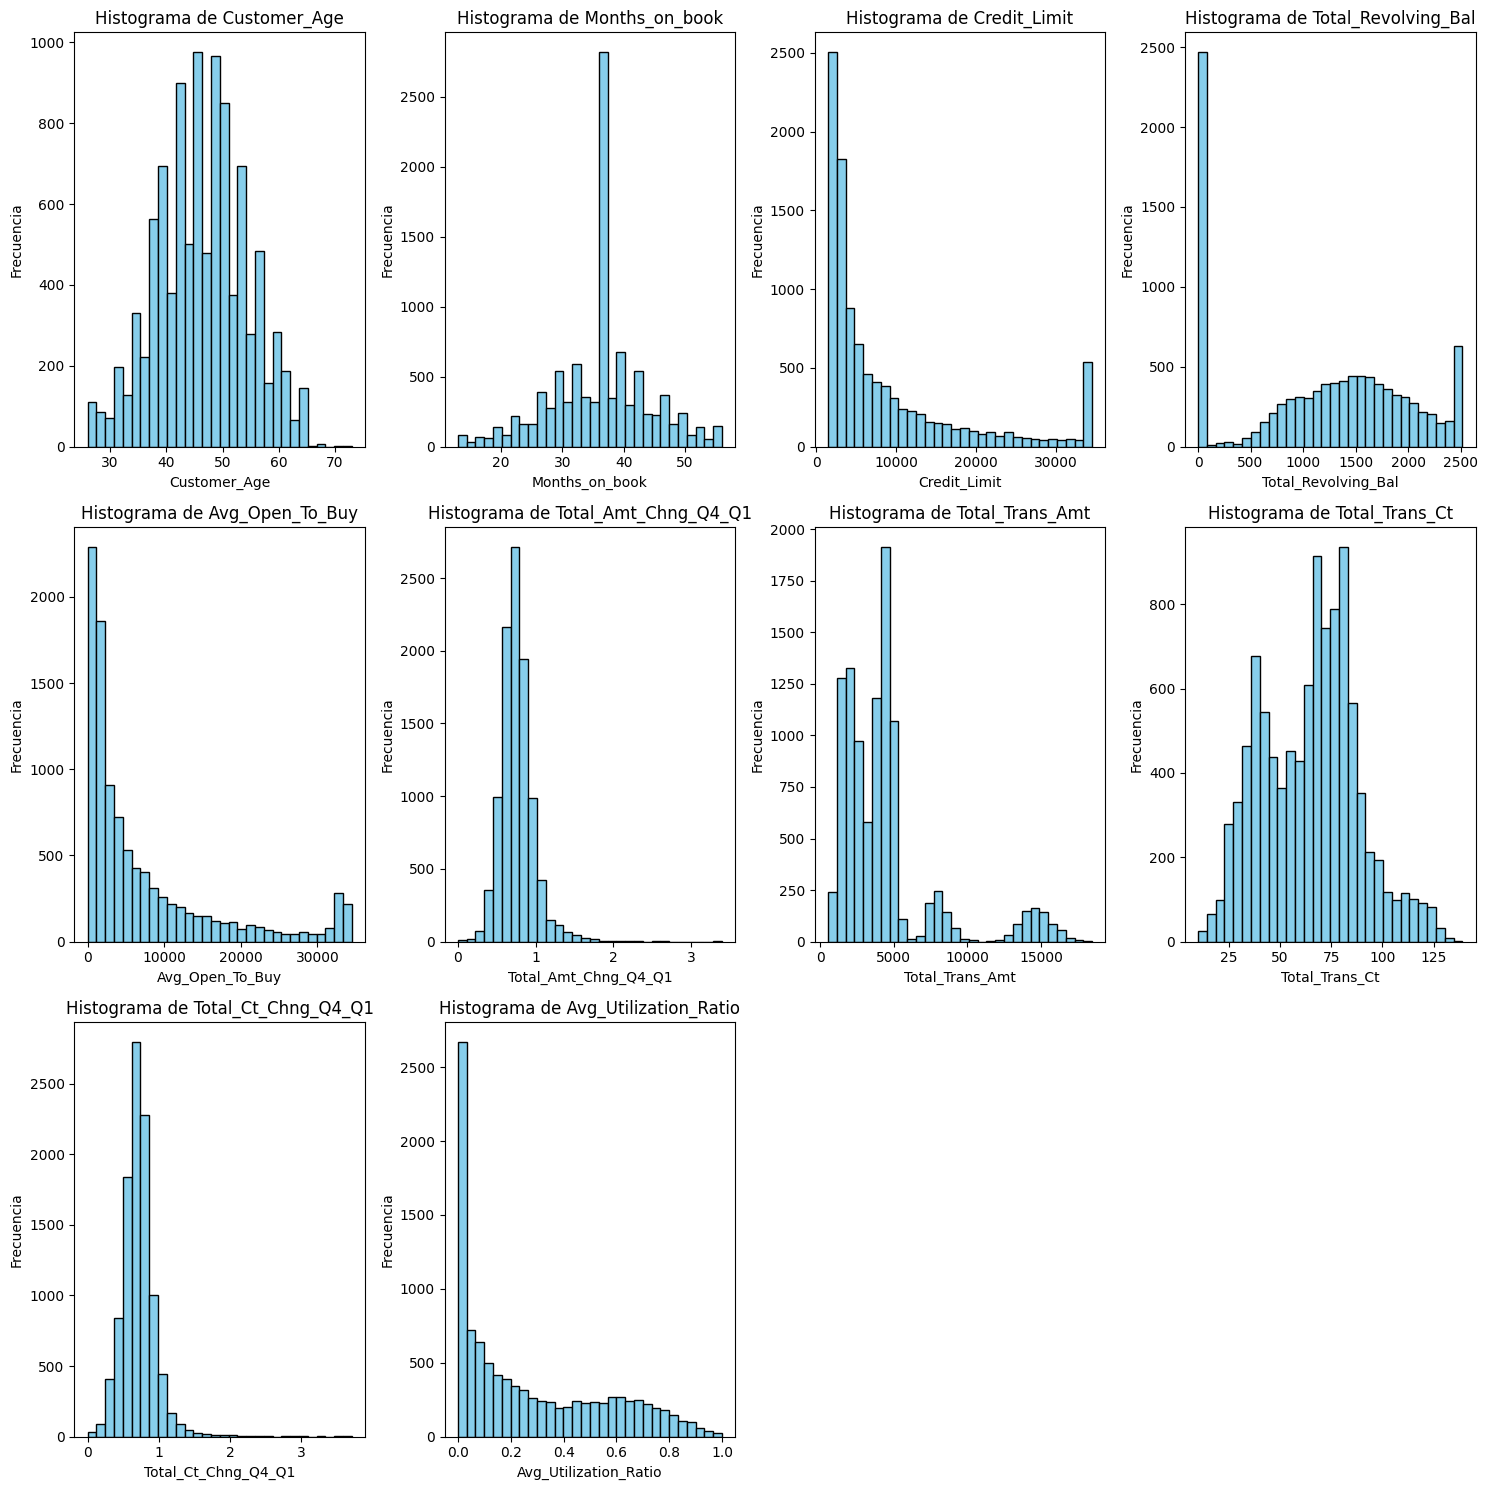

In [4]:
import matplotlib.pyplot as plt
numerical_columns = data.select_dtypes(include=['int',"float64"]).columns

# Determinar el tamaño de la cuadrícula
n_cols = 4
n_rows = (len(numerical_columns) + n_cols - 1) // n_cols  # Redondeo hacia arriba para que haya suficiente espacio

# Crear la figura y los ejes
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 5))
axes = axes.flatten()  # Aplanar los ejes para iterar sobre ellos fácilmente

# Generar un histograma para cada columna numérica
for i, col in enumerate(numerical_columns):
    axes[i].hist(data[col].dropna(), bins=30, color='skyblue', edgecolor='black')
    axes[i].set_title(f'Histograma de {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frecuencia')

# Eliminar cualquier gráfico extra (en caso de que haya más subplots que columnas)
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Ajustar el espaciado entre gráficos
plt.tight_layout()
plt.show()

/var/folders/cq/spz6vjb90jjcq1jvplc3bmdh0000gn/T/ipykernel_32483/3070119061.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df[cat_var], y=df[num_var], ax=ax, palette="Set2")
/var/folders/cq/spz6vjb90jjcq1jvplc3bmdh0000gn/T/ipykernel_32483/3070119061.py:31: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
/var/folders/cq/spz6vjb90jjcq1jvplc3bmdh0000gn/T/ipykernel_32483/3070119061.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df[cat_var], y=df[num_var], ax=ax, palette="Set2")
/var/folders/cq/spz6vjb90jjcq1jvplc3bmdh0000gn/T/ipykernel_32483/30

/var/folders/cq/spz6vjb90jjcq1jvplc3bmdh0000gn/T/ipykernel_32483/3070119061.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df[cat_var], y=df[num_var], ax=ax, palette="Set2")
/var/folders/cq/spz6vjb90jjcq1jvplc3bmdh0000gn/T/ipykernel_32483/3070119061.py:31: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
/var/folders/cq/spz6vjb90jjcq1jvplc3bmdh0000gn/T/ipykernel_32483/3070119061.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df[cat_var], y=df[num_var], ax=ax, palette="Set2")
/var/folders/cq/spz6vjb90jjcq1jvplc3bmdh0000gn/T/ipykernel_32483/30

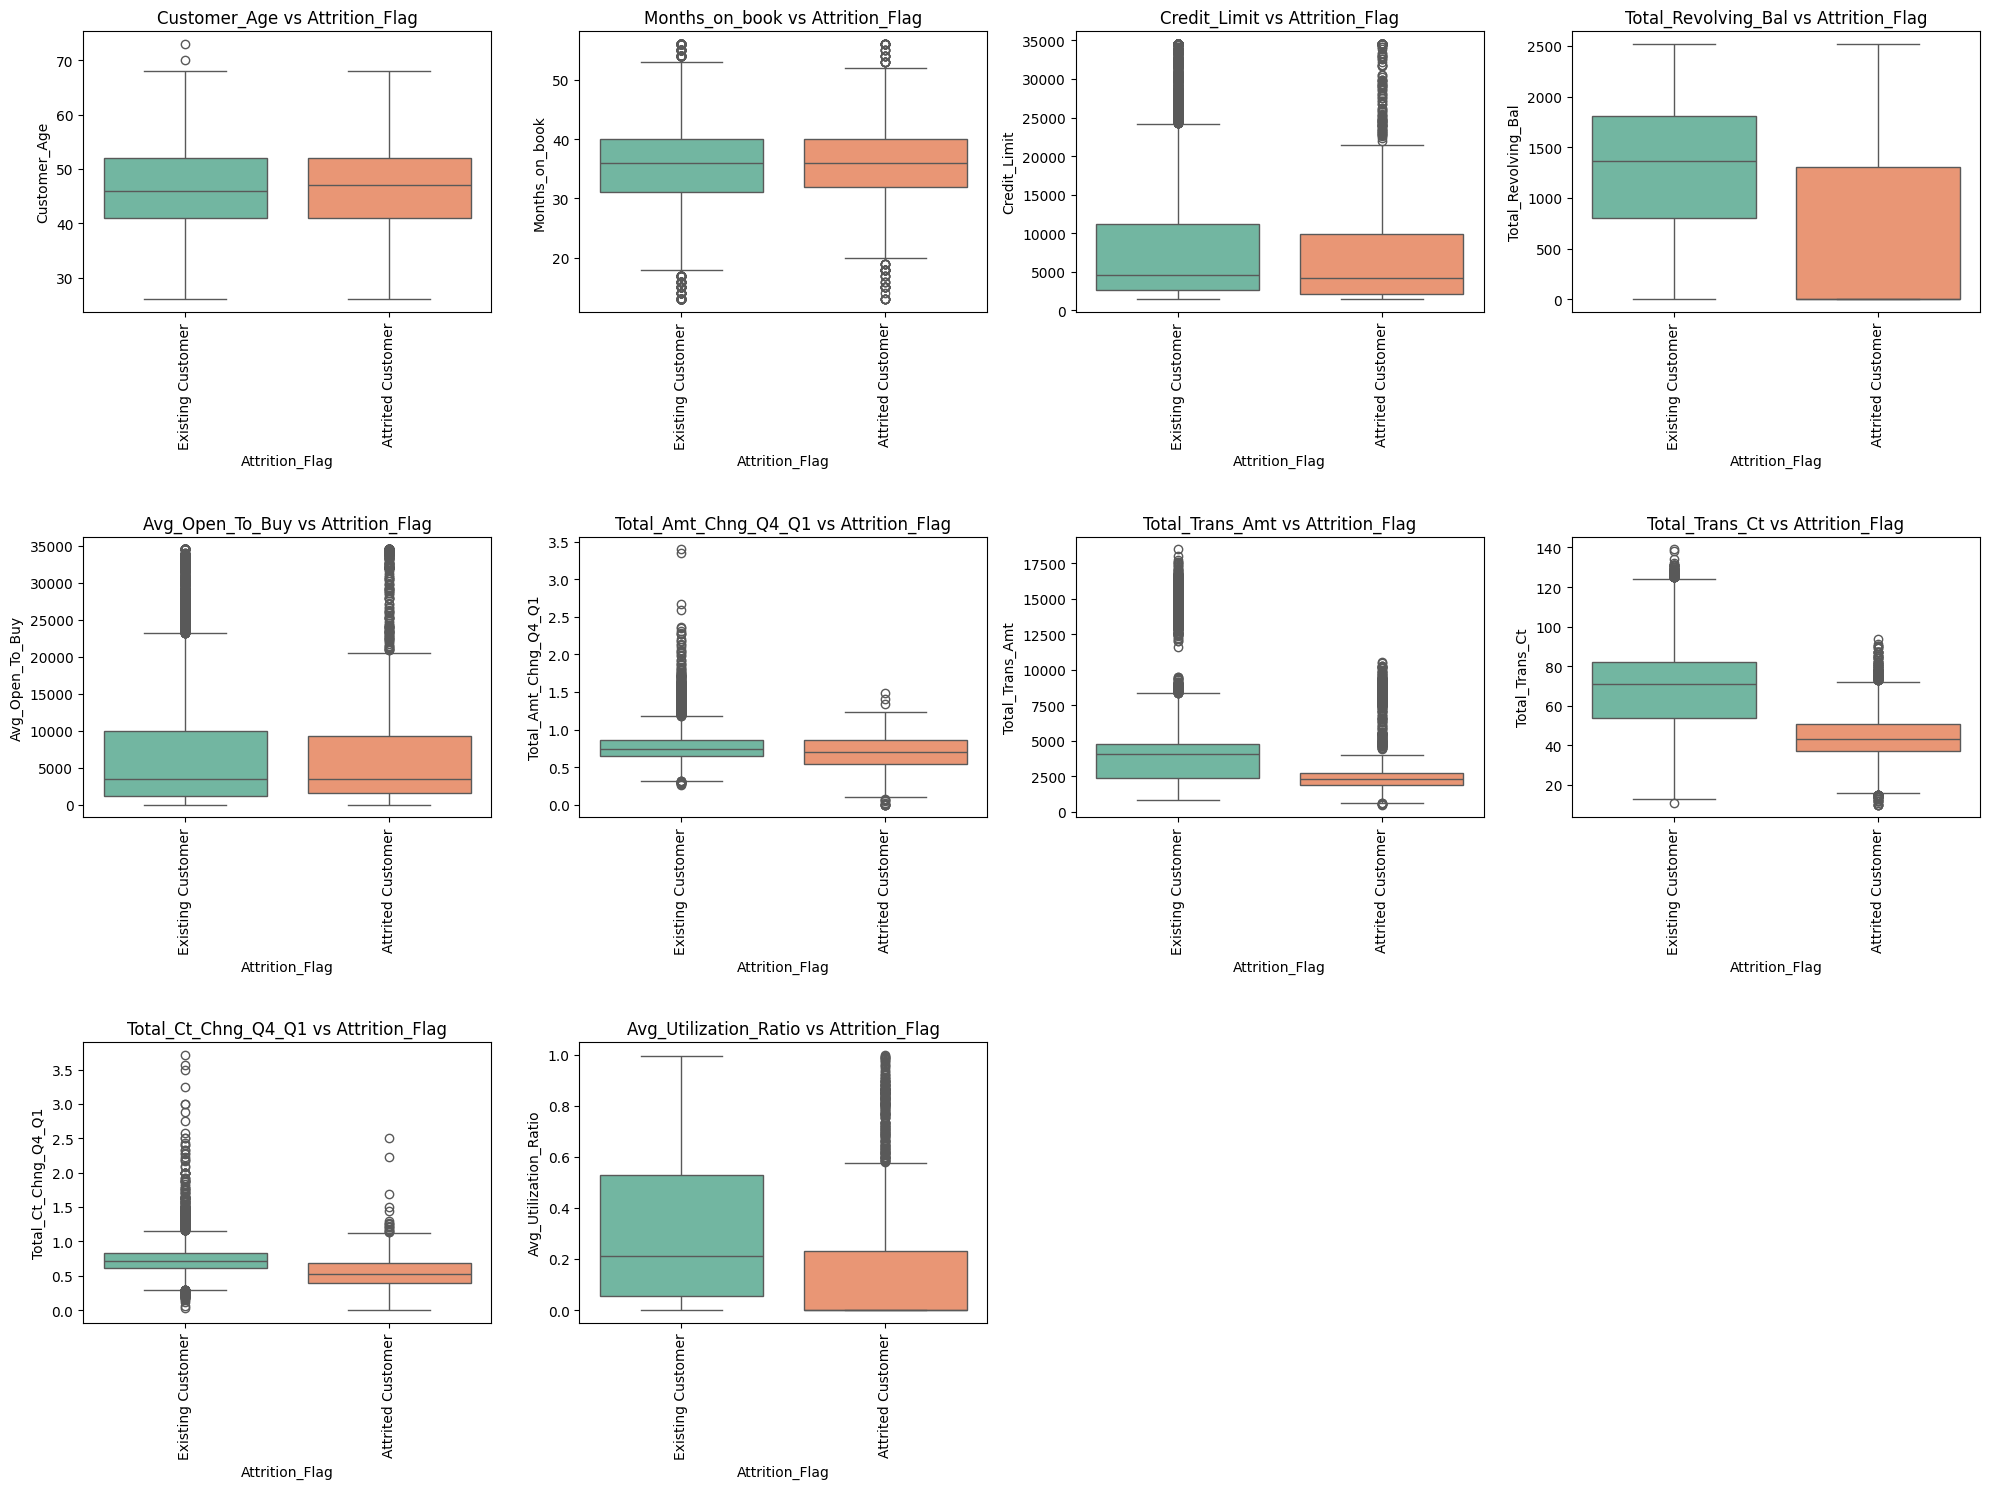

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

def plot_categorical_vs_numerical(df, cat_var):
   
    # Filtrar solo columnas numéricas (float e int)
    num_vars = df.select_dtypes(include=['number']).columns
    num_vars = [var for var in num_vars if var != cat_var]  # Excluir la categórica si es numérica
    
    # Si no hay variables numéricas, salir de la función
    if not num_vars:
        print("No hay variables numéricas para graficar.")
        return
    
    num_plots = len(num_vars)
    
    # Definir la cantidad de filas y columnas de manera óptima
    cols = 4  # Máximo 3 gráficos por fila
    rows = int(np.ceil(num_plots / cols))  # Calcular las filas necesarias
    
    fig, axes = plt.subplots(nrows=rows, ncols=cols, figsize=(5 * cols, 5 * rows))
    axes = np.array(axes).flatten()  # Asegurar que `axes` sea un arreglo 1D para iterar

    # Generar boxplots
    for ax, num_var in zip(axes, num_vars):
        sns.boxplot(x=df[cat_var], y=df[num_var], ax=ax, palette="Set2")
        ax.set_title(f'{num_var} vs {cat_var}')
        ax.set_xlabel(cat_var)
        ax.set_ylabel(num_var)
        ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
    
    # Eliminar ejes vacíos si hay más subgráficos de los necesarios
    for ax in axes[len(num_vars):]:
        ax.set_visible(False)

    plt.tight_layout()
    plt.subplots_adjust(hspace=0.8)  # Ajustar espacio entre subgráficos
    plt.show()

# Verificar que Train está definido antes de llamar la función
if 'data' in locals():
    plot_categorical_vs_numerical(data, 'Attrition_Flag')
else:
    print("Error: La variable 'Train' no está definida.")

In [6]:
data.describe()

Customer_Age  Months_on_book  Credit_Limit  Total_Revolving_Bal  \
count  10127.000000    10127.000000  10127.000000         10127.000000   
mean      46.325960       35.928409   8631.953698          1162.814061   
std        8.016814        7.986416   9088.776650           814.987335   
min       26.000000       13.000000   1438.300000             0.000000   
25%       41.000000       31.000000   2555.000000           359.000000   
50%       46.000000       36.000000   4549.000000          1276.000000   
75%       52.000000       40.000000  11067.500000          1784.000000   
max       73.000000       56.000000  34516.000000          2517.000000   

       Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  \
count     10127.000000          10127.000000     10127.000000    10127.000000   
mean       7469.139637              0.759941      4404.086304       64.858695   
std        9090.685324              0.219207      3397.129254       23.472570   
min           3.000000              0.000000       510.000000       10.000000   
25%        1324.500000              0.631000      2155.500000       45.000000   
50%        3474.000000              0.736000      3899.000000       67.000000   
75%        9859.000000              0.859000      4741.000000       81.000000   
max       34516.000000              3.397000     18484.000000      139.000000   

       Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  
count         10127.000000           10127.000000  
mean              0.712222               0.274894  
std               0.238086               0.275691  
min               0.000000               0.000000  
25%               0.582000               0.023000  
50%               0.702000               0.176000  
75%               0.818000               0.503000  
max               3.714000               0.999000

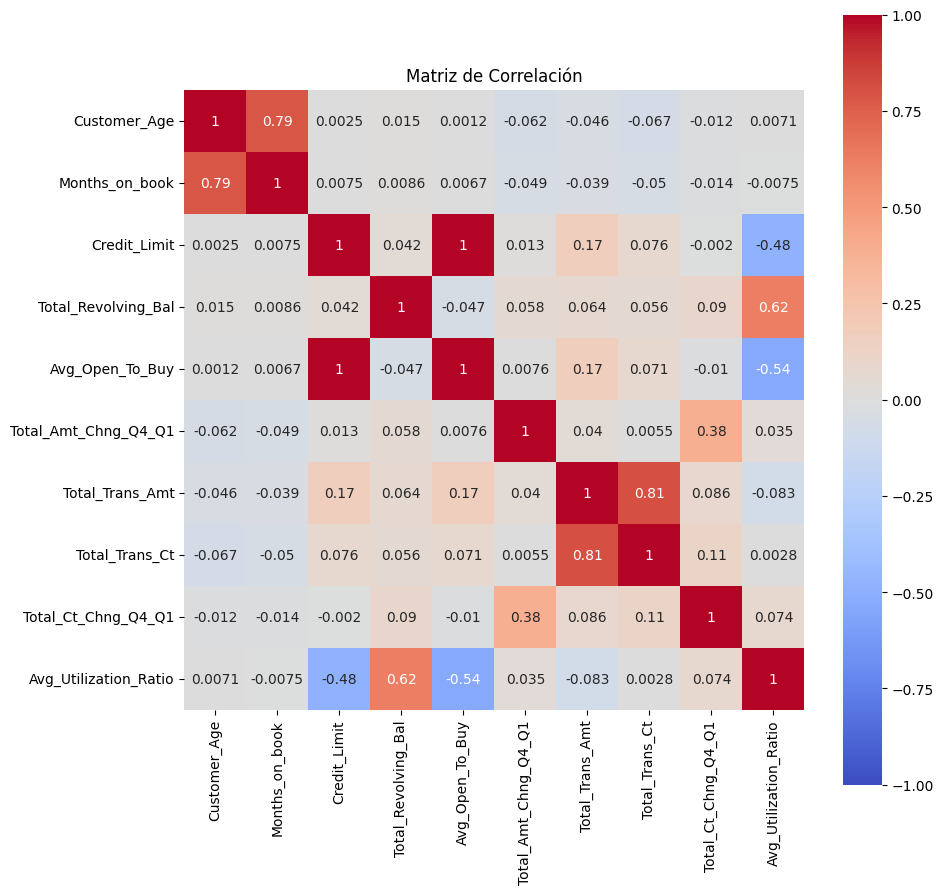

In [7]:
#Se genera mapa de correlacion entre variables 
numerical_data = data.select_dtypes(include=['int',"float64"])
import matplotlib.pyplot as plt
# Calcular la matriz de correlación
correlation_matrix = numerical_data.corr()

# Generar el heatmap
plt.figure(figsize=(10, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, square=True)
plt.title("Matriz de Correlación")
plt.show()

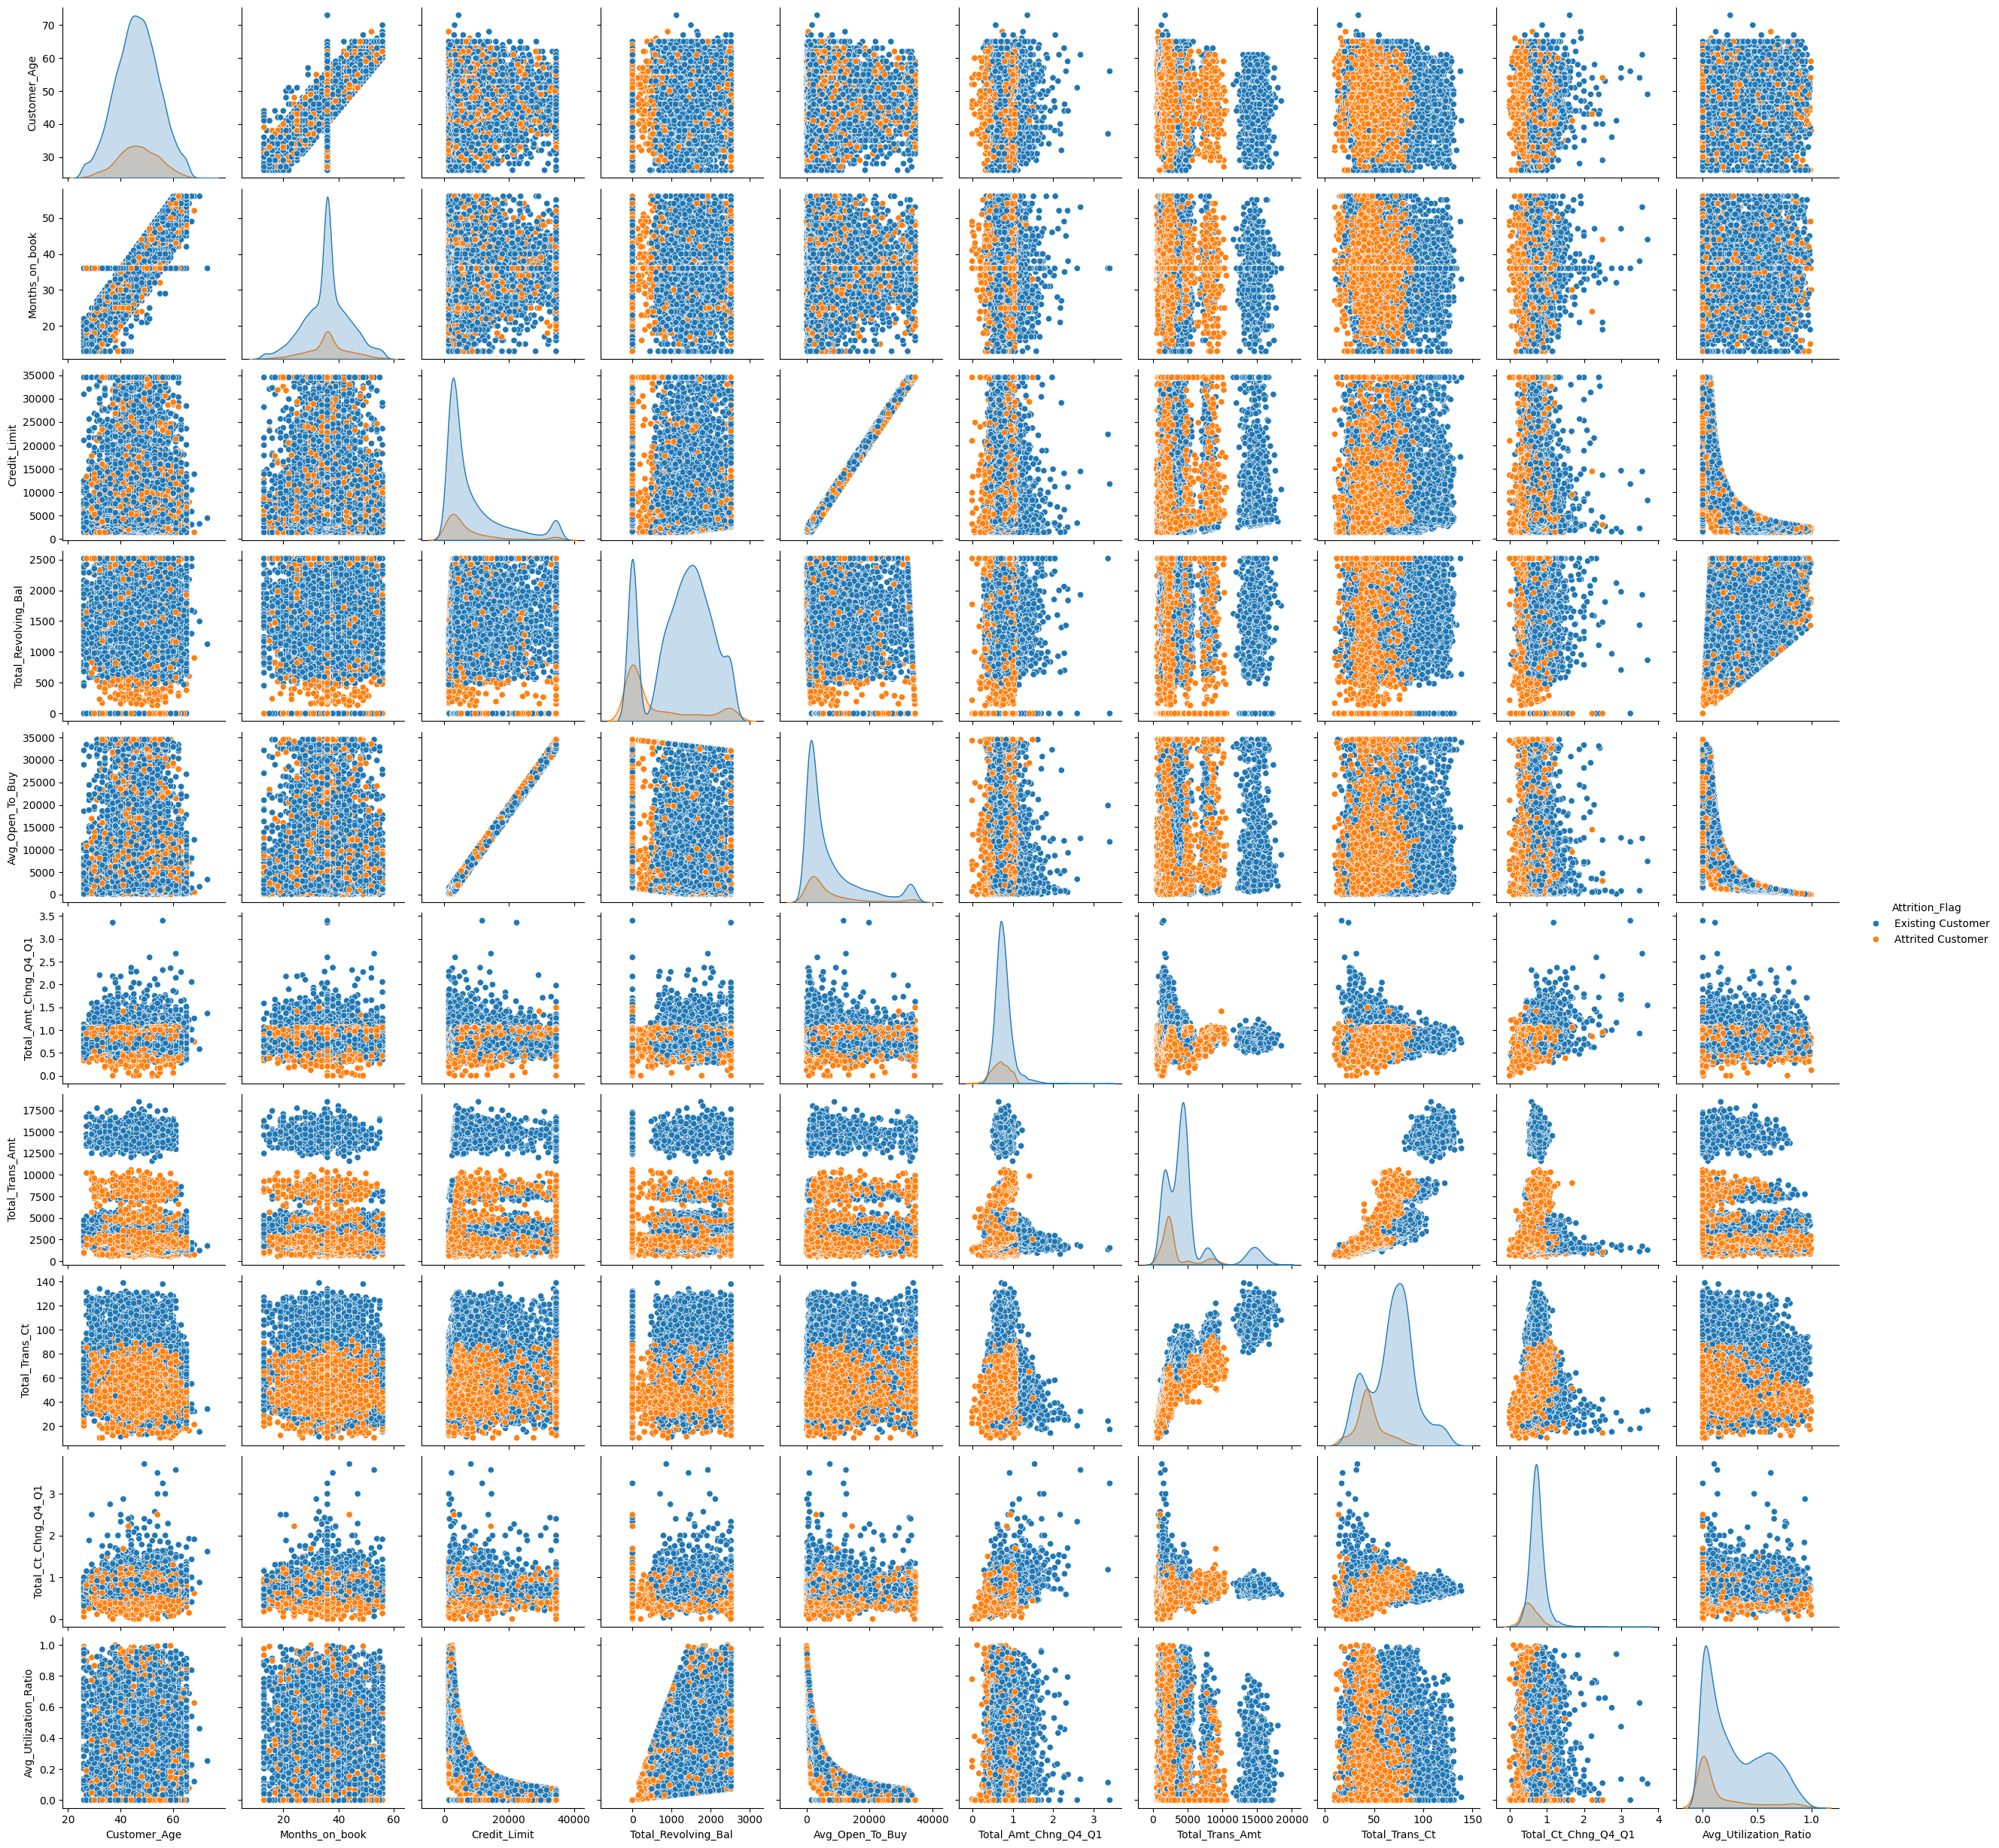

In [8]:
sns.pairplot(data=data, hue='Attrition_Flag')

## Procedimiento

1. Se cargó la base de datos `BankChurners.csv` utilizando la librería **pandas** mediante la función `read_csv()`. Posteriormente se inspeccionó la estructura del conjunto de datos con `data.info()` para identificar el tipo de variables, número de registros y presencia de valores faltantes.

2. Se realizó un proceso de limpieza de datos eliminando las filas que contenían valores nulos mediante `dropna()`, con el fin de evitar inconsistencias durante el análisis y el posterior entrenamiento de modelos.

3. Se estandarizaron los nombres de las columnas eliminando los espacios en blanco utilizando `data.columns.str.strip()`, garantizando así que las variables pudieran ser manipuladas correctamente dentro del código.

4. Se eliminaron variables categóricas  tales como: `Gender`, `Marital_Status`, `Education_Level`, `Income_Category`, `Card_Category`, `Dependent_count`, `Total_Relationship_Count`, `Months_Inactive_12_mon`, `Contacts_Count_12_mon`, las variables del clasificador Naive Bayes incluidas en el dataset y el identificador único `CLIENTNUM`. Esto se realizó con el objetivo de conservar únicamente variables numéricas útiles para el análisis exploratorio y el modelamiento.

5. Posteriormente se identificaron las variables numéricas del conjunto de datos y se generaron histogramas para cada una de ellas utilizando **matplotlib**, con el propósito de analizar la distribución de los datos, detectar posibles asimetrías, valores extremos y rangos de variación.

6. Se implementó una función que genera gráficos tipo **boxplot** para analizar la relación entre la variable categórica objetivo `Attrition_Flag` y cada una de las variables numéricas. Este procedimiento permitió evaluar visualmente diferencias en la distribución de las variables entre clientes que abandonan el servicio y los que permanecen.

7. Se calcularon estadísticas descriptivas del conjunto de datos mediante `data.describe()`, obteniendo medidas como media, desviación estándar, mínimo, máximo y cuartiles, las cuales permiten comprender el comportamiento general de las variables.

8. Finalmente, se calculó la matriz de correlación entre todas las variables numéricas y se representó mediante un **heatmap** utilizando la librería **seaborn**. Este análisis permitió identificar relaciones lineales entre variables, posibles redundancias y variables altamente correlacionadas.


## Consideraciones

1. El análisis se realizó únicamente con variables numéricas, debido a que las variables categóricas fueron eliminadas para simplificar el análisis exploratorio inicial.

2. Los registros con valores faltantes fueron eliminados del dataframe de entrenamiento tal como se plasmo en el inicio del taller 

## Analisis 

**Customer_Age**  
- Presenta una distribución aproximadamente normal centrada entre los 40 y 55 años. Esto indica que la mayor parte de los clientes del banco corresponde a población adulta media, mientras que existen pocos clientes jóvenes o de edades muy avanzadas.

- No se observan diferencias importantes entre clientes que abandonan y los que permanecen. Ambas distribuciones son muy similares, por lo que la edad no parece ser un factor determinante del abandono.


**Months_on_book**  
- La variable muestra una concentración importante entre 30 y 45 meses, lo que sugiere que la mayoría de los clientes llevan entre 2.5 y 4 años vinculados con la entidad financiera. Esto puede interpretarse como una cartera relativamente estable.

- El tiempo de vinculación con el banco también presenta comportamientos muy parecidos entre ambos grupos. Esto indica que la antigüedad del cliente por sí sola no explica el retiro de los clientes

**Credit_Limit**  
- Se observa una distribución  asimétrica positiva . La mayoría de clientes posee límites de crédito bajos o medios, mientras que un grupo pequeño presenta límites muy altos. Esto evidencia segmentación de clientes según su capacidad financiera.

- Los clientes que abandonan tienden a presentar límites de crédito ligeramente menores en comparación con los clientes activos. Esto sugiere que clientes con menor capacidad crediticia podrían tener mayor probabilidad de abandono.

**Avg_Open_To_Buy**  
- Presenta un comportamiento muy similar al del límite de crédito, lo cual es consistente ya que esta variable representa el cupo disponible. La concentración en valores bajos indica que muchos clientes utilizan buena parte de su cupo.

- El comportamiento es consistente con el límite de crédito. Los clientes que abandonan poseen menor cupo disponible en promedio, lo cual puede indicar menor actividad financiera o menor capacidad de endeudamiento.

**Total_Revolving_Bal**  
- Se observa una gran acumulación de valores cercanos a cero. Esto sugiere que una proporción considerable de clientes no mantiene deuda rotativa y probablemente paga el total de la tarjeta cada periodo de facturación.

- los clientes que permanecen presentan saldos rotativos mayores, mientras que muchos clientes que abandonan tienen valores cercanos a cero. Esto sugiere que los clientes que usan menos la tarjeta tienden a cancelarla.

**Total_Trans_Amt**  
- Muestra una distribución multimodal, lo cual indica la existencia de diferentes tipos de clientes: algunos realizan pocas compras, otros tienen uso moderado y un grupo más reducido realiza altos montos de transacciones.

- Los clientes existentes realizan montos de compra significativamente mayores que los clientes que abandonan. Esto indica que la baja actividad transaccional es un fuerte indicador de churn.

**Total_Trans_Ct**  
- Presenta una forma aproximadamente normal entre 40 y 90 transacciones. Esto indica que la mayoría de los clientes realiza un número moderado de operaciones durante el periodo analizado.

- Es una de las variables más discriminantes. Los clientes activos realizan muchas más transacciones que los clientes que abandonan. Esto refuerza la idea de que el abandono está fuertemente asociado al bajo uso del producto.


**Avg_Utilization_Ratio**  
- Se observa una fuerte concentración cerca de 0. Esto indica que la mayoría de clientes utiliza una pequeña proporción de su límite de crédito, mientras que pocos clientes tienen alta utilización.

- Los clientes que abandonan presentan, en general, menor utilización del crédito. Es decir, utilizan muy poco la tarjeta antes de cancelarla.

**Total_Amt_Chng_Q4_Q1**  
- Presenta una distribución concentrada alrededor de 1, lo que indica que la mayoría de los clientes mantiene un comportamiento estable en el monto de compras entre trimestres.

- Los clientes que abandonan muestran una reducción en el cambio del monto transado entre periodos. Esto sugiere que antes del abandono existe una disminución progresiva en el uso.


**Total_Ct_Chng_Q4_Q1**  
- Tiene una distribución similar, evidenciando que la cantidad de transacciones entre periodos no cambia significativamente para la mayoría de los clientes.

- El mismo patrón se observa en la cantidad de transacciones. Antes de cancelar la tarjeta, el cliente empieza a usarla cada vez menos.

En conjunto, los histogramas sugieren la presencia de diferentes perfiles de clientes dentro de la base de datos:

- Clientes con bajo uso de la tarjeta (bajo monto y pocas transacciones)
- Clientes de uso moderado (grupo mayoritario)
- Clientes de alto uso (alto monto, alto número de transacciones y mayor límite)

Las variables relacionadas con utilización del crédito, número de transacciones y montos de compra parecen especialmente relevantes para explicar el abandono del cliente, ya que reflejan directamente el nivel de actividad financiera del usuario con la tarjeta.

A partir del analisis del comportamiento de los cuartiles (Q1,Q2,Q3) mediante los boxplot realizado se evidencia que el  abandono del cliente no parece estar asociado a variables demográficas, sino principalmente a variables de comportamiento financiero.  

Los clientes que abandonan el banco presentan un patrón claro:

- Realizan menos transacciones
- Mueven menores montos de dinero
- Utilizan poco su cupo de crédito
- Reducen progresivamente el uso de la tarjeta antes de cancelarla

## Análisis de la Matriz de Correlación

La matriz de correlación permite identificar relaciones lineales entre variables:

- Existe una alta correlación positiva entre **Total_Trans_Amt** y **Total_Trans_Ct (≈ 0.81)**, lo cual es esperado: quien realiza más transacciones también mueve más dinero.
- **Customer_Age** y **Months_on_book (≈ 0.79)** están fuertemente correlacionadas, indicando que clientes mayores suelen tener más tiempo con el banco.
- **Avg_Utilization_Ratio** presenta correlación positiva con **Total_Revolving_Bal (≈ 0.62)**: a mayor deuda rotativa, mayor utilización del cupo.
- Existe correlación negativa entre **Avg_Utilization_Ratio** y **Avg_Open_To_Buy (≈ -0.54)**: cuando aumenta el cupo disponible, disminuye la utilización.
- También se observa correlación negativa entre **Credit_Limit** y **Avg_Utilization_Ratio (≈ -0.48)**, indicando que clientes con mayores límites suelen utilizar proporcionalmente menos su crédito.





### 2. Estimación del modelo usando una red neuronal con keras [30 puntos]

Estimen un modelo predictivo usando la muestra de entrenamiento y evalúen su desempeño en test con hiperparámetros de su selección.

In [9]:
#### Utilicen este espacio para escribir los códigos del procedimiento del punto 2 ####
from sklearn.preprocessing import StandardScaler
y=data["Attrition_Flag"]
X=data.drop("Attrition_Flag", axis=1)
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y,test_size=0.2,random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full)
#Se escalan los datos
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [10]:
model = keras.models.Sequential()
model.add(keras.layers.Dense(400, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(1, activation="sigmoid"))

In [11]:
from tensorflow.keras.utils import plot_model

# Build the model by specifying the input shape
model.build(input_shape=(None, 10))

plot_model(model, show_shapes=True, show_layer_names=True)

You must install pydot (`pip install pydot`) for `plot_model` to work.


In [12]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 400)            │         4,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 100)            │        40,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │           101 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 44,601 (174.22 KB)

 Trainable params: 44,601 (174.22 KB)

 Non-trainable params: 0 (0.00 B)

In [13]:

model.compile(loss="binary_crossentropy",
 optimizer="sgd",
 metrics=["accuracy"])

In [14]:
from tensorflow.keras.utils import to_categorical

# Convert string labels to integers
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_train_enc = le.fit_transform(y_train)
y_valid_enc = le.transform(y_valid)

history = model.fit(X_train, y_train_enc, epochs=30, validation_data=(X_valid, y_valid_enc))

Epoch 1/30


  1/190 ━━━━━━━━━━━━━━━━━━━━ 54s 290ms/step - accuracy: 0.5938 - loss: 0.6780

 74/190 ━━━━━━━━━━━━━━━━━━━━ 0s 689us/step - accuracy: 0.7994 - loss: 0.5925 

157/190 ━━━━━━━━━━━━━━━━━━━━ 0s 644us/step - accuracy: 0.8183 - loss: 0.5446

190/190 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8217 - loss: 0.5314 - val_accuracy: 0.8193 - val_loss: 0.4127


Epoch 2/30


  1/190 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9062 - loss: 0.2991

 85/190 ━━━━━━━━━━━━━━━━━━━━ 0s 601us/step - accuracy: 0.8533 - loss: 0.3641

169/190 ━━━━━━━━━━━━━━━━━━━━ 0s 600us/step - accuracy: 0.8519 - loss: 0.3607

190/190 ━━━━━━━━━━━━━━━━━━━━ 0s 900us/step - accuracy: 0.8517 - loss: 0.3605 - val_accuracy: 0.8470 - val_loss: 0.3629


Epoch 3/30


  1/190 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.8750 - loss: 0.3777

 83/190 ━━━━━━━━━━━━━━━━━━━━ 0s 616us/step - accuracy: 0.8719 - loss: 0.3329

167/190 ━━━━━━━━━━━━━━━━━━━━ 0s 608us/step - accuracy: 0.8735 - loss: 0.3308

190/190 ━━━━━━━━━━━━━━━━━━━━ 0s 890us/step - accuracy: 0.8739 - loss: 0.3302 - val_accuracy: 0.8682 - val_loss: 0.3385


Epoch 4/30


  1/190 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9375 - loss: 0.3276

 85/190 ━━━━━━━━━━━━━━━━━━━━ 0s 601us/step - accuracy: 0.8920 - loss: 0.3054

170/190 ━━━━━━━━━━━━━━━━━━━━ 0s 598us/step - accuracy: 0.8905 - loss: 0.3042

190/190 ━━━━━━━━━━━━━━━━━━━━ 0s 879us/step - accuracy: 0.8901 - loss: 0.3043 - val_accuracy: 0.8727 - val_loss: 0.3225


Epoch 5/30


  1/190 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.8438 - loss: 0.3048

 85/190 ━━━━━━━━━━━━━━━━━━━━ 0s 597us/step - accuracy: 0.8868 - loss: 0.2900

170/190 ━━━━━━━━━━━━━━━━━━━━ 0s 593us/step - accuracy: 0.8883 - loss: 0.2923

190/190 ━━━━━━━━━━━━━━━━━━━━ 0s 872us/step - accuracy: 0.8885 - loss: 0.2925 - val_accuracy: 0.8781 - val_loss: 0.3113


Epoch 6/30


  1/190 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.8438 - loss: 0.3310

 84/190 ━━━━━━━━━━━━━━━━━━━━ 0s 605us/step - accuracy: 0.8831 - loss: 0.2970

169/190 ━━━━━━━━━━━━━━━━━━━━ 0s 598us/step - accuracy: 0.8875 - loss: 0.2911

190/190 ━━━━━━━━━━━━━━━━━━━━ 0s 877us/step - accuracy: 0.8882 - loss: 0.2902 - val_accuracy: 0.8806 - val_loss: 0.3020


Epoch 7/30


  1/190 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.8125 - loss: 0.4390

 85/190 ━━━━━━━━━━━━━━━━━━━━ 0s 602us/step - accuracy: 0.9031 - loss: 0.2666

169/190 ━━━━━━━━━━━━━━━━━━━━ 0s 599us/step - accuracy: 0.8974 - loss: 0.2713

190/190 ━━━━━━━━━━━━━━━━━━━━ 0s 873us/step - accuracy: 0.8967 - loss: 0.2717 - val_accuracy: 0.8786 - val_loss: 0.2942


Epoch 8/30


  1/190 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9688 - loss: 0.1839

 78/190 ━━━━━━━━━━━━━━━━━━━━ 0s 651us/step - accuracy: 0.8962 - loss: 0.2632

155/190 ━━━━━━━━━━━━━━━━━━━━ 0s 653us/step - accuracy: 0.8954 - loss: 0.2645

190/190 ━━━━━━━━━━━━━━━━━━━━ 0s 933us/step - accuracy: 0.8951 - loss: 0.2650 - val_accuracy: 0.8855 - val_loss: 0.2849


Epoch 9/30


  1/190 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9062 - loss: 0.2436

 85/190 ━━━━━━━━━━━━━━━━━━━━ 0s 602us/step - accuracy: 0.8982 - loss: 0.2588

169/190 ━━━━━━━━━━━━━━━━━━━━ 0s 599us/step - accuracy: 0.8960 - loss: 0.2611

190/190 ━━━━━━━━━━━━━━━━━━━━ 0s 876us/step - accuracy: 0.8961 - loss: 0.2610 - val_accuracy: 0.8870 - val_loss: 0.2782


Epoch 10/30


  1/190 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9688 - loss: 0.1547

 86/190 ━━━━━━━━━━━━━━━━━━━━ 0s 593us/step - accuracy: 0.8925 - loss: 0.2636

170/190 ━━━━━━━━━━━━━━━━━━━━ 0s 596us/step - accuracy: 0.8945 - loss: 0.2592

190/190 ━━━━━━━━━━━━━━━━━━━━ 0s 882us/step - accuracy: 0.8950 - loss: 0.2583 - val_accuracy: 0.8875 - val_loss: 0.2714


Epoch 11/30


  1/190 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9375 - loss: 0.1491

 89/190 ━━━━━━━━━━━━━━━━━━━━ 0s 570us/step - accuracy: 0.9105 - loss: 0.2324

171/190 ━━━━━━━━━━━━━━━━━━━━ 0s 591us/step - accuracy: 0.9057 - loss: 0.2391

190/190 ━━━━━━━━━━━━━━━━━━━━ 0s 895us/step - accuracy: 0.9050 - loss: 0.2399 - val_accuracy: 0.8889 - val_loss: 0.2661


Epoch 12/30


  1/190 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.7812 - loss: 0.4173

 86/190 ━━━━━━━━━━━━━━━━━━━━ 0s 591us/step - accuracy: 0.8962 - loss: 0.2469

169/190 ━━━━━━━━━━━━━━━━━━━━ 0s 600us/step - accuracy: 0.8980 - loss: 0.2445

190/190 ━━━━━━━━━━━━━━━━━━━━ 0s 880us/step - accuracy: 0.8981 - loss: 0.2440 - val_accuracy: 0.8904 - val_loss: 0.2597


Epoch 13/30


  1/190 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.8750 - loss: 0.2079

 84/190 ━━━━━━━━━━━━━━━━━━━━ 0s 604us/step - accuracy: 0.8984 - loss: 0.2363

169/190 ━━━━━━━━━━━━━━━━━━━━ 0s 597us/step - accuracy: 0.9011 - loss: 0.2352

190/190 ━━━━━━━━━━━━━━━━━━━━ 0s 880us/step - accuracy: 0.9013 - loss: 0.2351 - val_accuracy: 0.8939 - val_loss: 0.2539


Epoch 14/30


  1/190 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9375 - loss: 0.1950

 83/190 ━━━━━━━━━━━━━━━━━━━━ 0s 612us/step - accuracy: 0.9022 - loss: 0.2336

165/190 ━━━━━━━━━━━━━━━━━━━━ 0s 613us/step - accuracy: 0.9016 - loss: 0.2331

190/190 ━━━━━━━━━━━━━━━━━━━━ 0s 890us/step - accuracy: 0.9018 - loss: 0.2328 - val_accuracy: 0.8949 - val_loss: 0.2504


Epoch 15/30


  1/190 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9062 - loss: 0.2345

 82/190 ━━━━━━━━━━━━━━━━━━━━ 0s 619us/step - accuracy: 0.9123 - loss: 0.2173

166/190 ━━━━━━━━━━━━━━━━━━━━ 0s 608us/step - accuracy: 0.9081 - loss: 0.2215

190/190 ━━━━━━━━━━━━━━━━━━━━ 0s 891us/step - accuracy: 0.9076 - loss: 0.2219 - val_accuracy: 0.8968 - val_loss: 0.2452


Epoch 16/30


  1/190 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9688 - loss: 0.1988

 84/190 ━━━━━━━━━━━━━━━━━━━━ 0s 604us/step - accuracy: 0.9216 - loss: 0.1964

166/190 ━━━━━━━━━━━━━━━━━━━━ 0s 610us/step - accuracy: 0.9154 - loss: 0.2052

190/190 ━━━━━━━━━━━━━━━━━━━━ 0s 883us/step - accuracy: 0.9144 - loss: 0.2071 - val_accuracy: 0.8968 - val_loss: 0.2409


Epoch 17/30


  1/190 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9375 - loss: 0.1771

 83/190 ━━━━━━━━━━━━━━━━━━━━ 0s 611us/step - accuracy: 0.9048 - loss: 0.2192

167/190 ━━━━━━━━━━━━━━━━━━━━ 0s 605us/step - accuracy: 0.9057 - loss: 0.2175

190/190 ━━━━━━━━━━━━━━━━━━━━ 0s 885us/step - accuracy: 0.9062 - loss: 0.2171 - val_accuracy: 0.8968 - val_loss: 0.2387


Epoch 18/30


  1/190 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.9062 - loss: 0.1866

 70/190 ━━━━━━━━━━━━━━━━━━━━ 0s 726us/step - accuracy: 0.9108 - loss: 0.2064

149/190 ━━━━━━━━━━━━━━━━━━━━ 0s 677us/step - accuracy: 0.9091 - loss: 0.2104

190/190 ━━━━━━━━━━━━━━━━━━━━ 0s 949us/step - accuracy: 0.9095 - loss: 0.2104 - val_accuracy: 0.9003 - val_loss: 0.2340


Epoch 19/30


  1/190 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.7500 - loss: 0.3841

 85/190 ━━━━━━━━━━━━━━━━━━━━ 0s 599us/step - accuracy: 0.9100 - loss: 0.2062

169/190 ━━━━━━━━━━━━━━━━━━━━ 0s 599us/step - accuracy: 0.9116 - loss: 0.2067

190/190 ━━━━━━━━━━━━━━━━━━━━ 0s 908us/step - accuracy: 0.9118 - loss: 0.2069 - val_accuracy: 0.9003 - val_loss: 0.2333


Epoch 20/30


  1/190 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.9062 - loss: 0.2663

 58/190 ━━━━━━━━━━━━━━━━━━━━ 0s 886us/step - accuracy: 0.9175 - loss: 0.1931

130/190 ━━━━━━━━━━━━━━━━━━━━ 0s 782us/step - accuracy: 0.9136 - loss: 0.2005

190/190 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9134 - loss: 0.2023 - val_accuracy: 0.9023 - val_loss: 0.2320


Epoch 21/30


  1/190 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.9688 - loss: 0.1269

 42/190 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9233 - loss: 0.1846 

 96/190 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9195 - loss: 0.1897

163/190 ━━━━━━━━━━━━━━━━━━━━ 0s 939us/step - accuracy: 0.9174 - loss: 0.1947

190/190 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9170 - loss: 0.1957 - val_accuracy: 0.9042 - val_loss: 0.2269


Epoch 22/30


  1/190 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.9062 - loss: 0.2713

 64/190 ━━━━━━━━━━━━━━━━━━━━ 0s 794us/step - accuracy: 0.9132 - loss: 0.2112

128/190 ━━━━━━━━━━━━━━━━━━━━ 0s 790us/step - accuracy: 0.9153 - loss: 0.2074

184/190 ━━━━━━━━━━━━━━━━━━━━ 0s 830us/step - accuracy: 0.9161 - loss: 0.2050

190/190 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9161 - loss: 0.2048 - val_accuracy: 0.9072 - val_loss: 0.2245


Epoch 23/30


  1/190 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9062 - loss: 0.2490

 75/190 ━━━━━━━━━━━━━━━━━━━━ 0s 684us/step - accuracy: 0.9148 - loss: 0.2104

144/190 ━━━━━━━━━━━━━━━━━━━━ 0s 706us/step - accuracy: 0.9140 - loss: 0.2082

190/190 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9149 - loss: 0.2056 - val_accuracy: 0.9067 - val_loss: 0.2233


Epoch 24/30


  1/190 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9062 - loss: 0.1453

 73/190 ━━━━━━━━━━━━━━━━━━━━ 0s 700us/step - accuracy: 0.9096 - loss: 0.2066

150/190 ━━━━━━━━━━━━━━━━━━━━ 0s 678us/step - accuracy: 0.9136 - loss: 0.1983

190/190 ━━━━━━━━━━━━━━━━━━━━ 0s 977us/step - accuracy: 0.9142 - loss: 0.1973 - val_accuracy: 0.9077 - val_loss: 0.2223


Epoch 25/30


  1/190 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9375 - loss: 0.1724

 74/190 ━━━━━━━━━━━━━━━━━━━━ 0s 687us/step - accuracy: 0.9265 - loss: 0.1819

150/190 ━━━━━━━━━━━━━━━━━━━━ 0s 675us/step - accuracy: 0.9224 - loss: 0.1874

190/190 ━━━━━━━━━━━━━━━━━━━━ 0s 994us/step - accuracy: 0.9216 - loss: 0.1885 - val_accuracy: 0.9067 - val_loss: 0.2211


Epoch 26/30


  1/190 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.9688 - loss: 0.1021

 65/190 ━━━━━━━━━━━━━━━━━━━━ 0s 788us/step - accuracy: 0.9258 - loss: 0.1866

127/190 ━━━━━━━━━━━━━━━━━━━━ 0s 797us/step - accuracy: 0.9229 - loss: 0.1894

190/190 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9211 - loss: 0.1903 - val_accuracy: 0.9087 - val_loss: 0.2201


Epoch 27/30


  1/190 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.9688 - loss: 0.2042

 66/190 ━━━━━━━━━━━━━━━━━━━━ 0s 772us/step - accuracy: 0.9206 - loss: 0.1850

131/190 ━━━━━━━━━━━━━━━━━━━━ 0s 775us/step - accuracy: 0.9211 - loss: 0.1840

190/190 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9207 - loss: 0.1849 - val_accuracy: 0.9102 - val_loss: 0.2161


Epoch 28/30


  1/190 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.9375 - loss: 0.0991

 76/190 ━━━━━━━━━━━━━━━━━━━━ 0s 675us/step - accuracy: 0.9036 - loss: 0.2063

142/190 ━━━━━━━━━━━━━━━━━━━━ 0s 718us/step - accuracy: 0.9087 - loss: 0.2012

190/190 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9118 - loss: 0.1974 - val_accuracy: 0.9112 - val_loss: 0.2165


Epoch 29/30


  1/190 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9688 - loss: 0.1055

 71/190 ━━━━━━━━━━━━━━━━━━━━ 0s 722us/step - accuracy: 0.9146 - loss: 0.2017

141/190 ━━━━━━━━━━━━━━━━━━━━ 0s 721us/step - accuracy: 0.9158 - loss: 0.1982

190/190 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9166 - loss: 0.1959 - val_accuracy: 0.9087 - val_loss: 0.2164


Epoch 30/30


  1/190 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.9375 - loss: 0.1488

 78/190 ━━━━━━━━━━━━━━━━━━━━ 0s 656us/step - accuracy: 0.9201 - loss: 0.1821

157/190 ━━━━━━━━━━━━━━━━━━━━ 0s 649us/step - accuracy: 0.9194 - loss: 0.1852

190/190 ━━━━━━━━━━━━━━━━━━━━ 0s 934us/step - accuracy: 0.9199 - loss: 0.1849 - val_accuracy: 0.9107 - val_loss: 0.2160


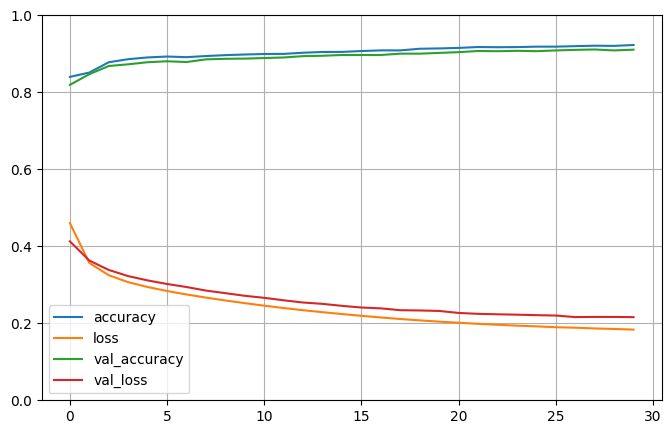

In [15]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

In [16]:
y_test_enc = le.transform(y_test)
test_loss, test_acc = model.evaluate(X_test, y_test_enc)

 1/64 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9688 - loss: 0.1099

64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 593us/step - accuracy: 0.9199 - loss: 0.2026


## Procedimiento

1. Se separó la variable objetivo `Attrition_Flag` del resto de variables del dataset.  
   Esta variable representa el abandono del cliente (clasificación binaria), mientras que el resto de columnas corresponden a las variables predictoras.

2. Posteriormente se dividió la base de datos en conjuntos de entrenamiento y prueba utilizando `train_test_split()`, asignando el **80%** de los datos para entrenamiento y el **20%** para prueba.  
  

3. El conjunto de entrenamiento se volvió a dividir en entrenamiento y validación. El conjunto de validación es fundamental en redes neuronales porque permite monitorear el aprendizaje del modelo durante las épocas de entrenamiento y detectar sobreajuste.

4. Antes de entrenar la red neuronal, se realizó la estandarización de las variables mediante `StandardScaler`.Las redes neuronales son altamente sensibles a la escala de las variables. Se realizo esta transformación de  las variables para que tengan media 0 y desviación estándar 1.

5. Se construyó una red neuronal artificial tipo **MLP (Multilayer Perceptron)** utilizando  Keras.  
   
   La forma de la red es:

   - Capa oculta 1: 400 neuronas con función de activación **ReLU**
   - Capa oculta 2: 100 neuronas con función de activación **ReLU**
   - Capa de salida: 1 neurona con función de activación **Sigmoid**

   La función ReLU introduce no linealidad al modelo y permite aprender relaciones complejas entre las variables.  
   La función Sigmoid en la salida permite obtener probabilidades entre 0 y 1, adecuadas para problemas de clasificación binaria.


6. El modelo fue compilado utilizando:

   - **Función de pérdida:** `binary_crossentropy`, adecuada para clasificación binaria.
   - **Optimizador:** `SGD (Stochastic Gradient Descent)`, encargado de ajustar los pesos de la red mediante backpropagation.
   - **Métrica:** `accuracy`, para medir el porcentaje de clasificaciones correctas.

8. La variable objetivo fue transformada mediante `LabelEncoder`, convirtiendo las etiquetas categóricas en valores numéricos (0 y 1).

9. Posteriormente se entrenó la red neuronal durante 30 épocas, utilizando el conjunto de validación para evaluar el desempeño del modelo en cada iteración.

10. Finalmente se graficó la evolución del entrenamiento (`loss` y `accuracy`) , lo que permitió observar la convergencia del modelo y su capacidad de generalización descartando que hubiera overfitting.



## Consideraciones

1. El problema corresponde a una clasificación  supervisada, donde el objetivo es predecir si un cliente abandonará el banco.

2. la estandarizacion de las variables predictoras  es un paso clave, ya que sin normalización las redes neuronales pueden presentar inestabilidad numérica y aprendizaje muy lento.

3. La función de activación Sigmoid en la capa de salida es apropiada porque permite interpretar la salida como probabilidad de abandono.


## Análisis

La red neuronal posee dos capas ocultas profundas (400 y 100 neuronas), lo que le permite modelar relaciones no lineales complejas. 

Durante el entrenamiento, el algoritmo **backpropagation** ajusta iterativamente los pesos de cada neurona minimizando la función de pérdida `binary_crossentropy`.  
El optimizador SGD realiza pequeñas actualizaciones de los pesos en cada lote de datos, permitiendo que el modelo converja progresivamente.

- La funcion de perdiad  entrenamiento  disminuye progresivamente → el modelo está aprendiendo patrones en los datos.
- La funcion de perdiad  de validacion sigue un comportamiento similar → el modelo generaliza correctamente sin tener sobreajuste
- La accuracy aumenta con las épocas → el modelo mejora su capacidad de clasificación.



## Conclusión

- La red neuronal construida permite modelar un problema de abandono de clientes como una función no lineal entre variables financieras y de comportamiento.  

- El uso del conjunto de validación confirma que el modelo no solo memoriza el conjunto de entrenamiento, sino que también generaliza a datos no vistos, por lo que constituye una aproximación adecuada para la predicción de churn en clientes bancarios.

- El modelo construido presenta un accuracy de 92.1% con respecto a los datos de test , lo que evidencia la buena capacidad predictiva del modelo para realizar predicciones sobre clientes con poitencial de declinar de su credito , en las pruebas realizadas no se evidencia sobre ajuste de la red a los datos de entrenamiento.

### 3. Elección del mejor modelo [40 puntos]

Ahora construyan una función que reciba por parámetro una lista de número de capas a utilizar,  números de neuronas por capa, así como funciones de activación a utilizar.

Dicha función debe entrenar el modelo con los datos de entrenamiento, evaluar con los datos de prueba para cada una de las combinaciones de hiperparámetros y encontrar cuál es la mejor combinación de hiperprámetros.  

Una vez hecho este procedimiento respondan a la siguiente pregunta:
 
¿Cómo argumenta que esta sea la selección óptima de hiperparámetros?

In [17]:
#### Utilicen este espacio para escribir los códigos del procedimiento del punto 3 ####
from tensorflow.keras import layers

def construir_modelo(n_capas, neuronas, activaciones, input_dim):

    model = keras.Sequential()

    
    model.add(layers.Dense(neuronas[0],
                           activation=activaciones[0],
                           input_shape=(input_dim,)))

    
    for i in range(1, n_capas):
        model.add(layers.Dense(neuronas[i],
                               activation=activaciones[i]))

    
    model.add(layers.Dense(1, activation="sigmoid"))

    model.compile(
        optimizer="adam",
        loss="binary_crossentropy",
        metrics=["accuracy"]
    )

    return model

In [18]:
#Definicion de funcion para buscar el mejor modelo

def buscar_mejor_modelo(X_train, y_train, X_test, y_test,
                        lista_capas,
                        lista_neuronas,
                        lista_activaciones,
                        epochs=20):

    mejor_accuracy = 0
    mejor_config = None
    mejor_modelo = None

    for n_capas in lista_capas:
        for neuronas in lista_neuronas:
            for activaciones in lista_activaciones:

                # validar tamaños
                if len(neuronas) != n_capas:
                    continue
                if len(activaciones) != n_capas:
                    continue

                print("\nProbando configuración:")
                print(f"Capas: {n_capas}")
                print(f"Neuronas: {neuronas}")
                print(f"Activaciones: {activaciones}")

                model = construir_modelo(
                    n_capas,
                    neuronas,
                    activaciones,
                    X_train.shape[1]
                )

                # entrenamiento
                model.fit(
                    X_train, y_train,
                    epochs=epochs,
                    verbose=0
                )

                # evaluación
                loss, acc = model.evaluate(X_test, y_test, verbose=0)

                print("Accuracy:", acc)

                # guardar mejor
                if acc > mejor_accuracy:
                    mejor_accuracy = acc
                    mejor_config = (n_capas, neuronas, activaciones)
                    mejor_modelo = model

    return mejor_modelo, mejor_config, mejor_accuracy


In [19]:
#Datos de Entrada para la función de búsqueda
lista_capas = [1,2,3]

lista_neuronas = [
    [32],
    [64],
    [64,32],
    [128,64],
    [128,64,32]
]

lista_activaciones = [
    ["relu"],
    ["tanh"],
    ["relu","relu"],
    ["tanh","relu"],
    ["relu","relu","relu"]
]

mejor_modelo, mejor_config, mejor_acc = buscar_mejor_modelo(
    X_train, y_train_enc,
    X_valid, y_valid_enc,
    lista_capas,
    lista_neuronas,
    lista_activaciones,
    epochs=25
)

print("\nMEJOR CONFIGURACIÓN:")
print(mejor_config)
print("Mejor accuracy:", mejor_acc)



Probando configuración:
Capas: 1
Neuronas: [32]
Activaciones: ['relu']


/Users/danilosuarezvargas/Documents/Maestria Universidad andes/Deep learning/semana 2/.venv/lib/python3.9/site-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Accuracy: 0.9121421575546265

Probando configuración:
Capas: 1
Neuronas: [32]
Activaciones: ['tanh']


Accuracy: 0.9096742272377014

Probando configuración:
Capas: 1
Neuronas: [64]
Activaciones: ['relu']


Accuracy: 0.9141165018081665

Probando configuración:
Capas: 1
Neuronas: [64]
Activaciones: ['tanh']


Accuracy: 0.9072062969207764

Probando configuración:
Capas: 2
Neuronas: [64, 32]
Activaciones: ['relu', 'relu']


Accuracy: 0.9234945774078369

Probando configuración:
Capas: 2
Neuronas: [64, 32]
Activaciones: ['tanh', 'relu']


Accuracy: 0.9318854808807373

Probando configuración:
Capas: 2
Neuronas: [128, 64]
Activaciones: ['relu', 'relu']


Accuracy: 0.9323790669441223

Probando configuración:
Capas: 2
Neuronas: [128, 64]
Activaciones: ['tanh', 'relu']


Accuracy: 0.9363277554512024

Probando configuración:
Capas: 3
Neuronas: [128, 64, 32]
Activaciones: ['relu', 'relu', 'relu']


Accuracy: 0.9343534111976624

MEJOR CONFIGURACIÓN:
(2, [128, 64], ['tanh', 'relu'])
Mejor accuracy: 0.9363277554512024


## Proccedimiento

### 1. Función `construir_modelo()`

Esta función construye  una red neuronal dependiendo de los hiperparámetros que se le entreguen.

Parámetros de entrada:

- `n_capas` → número de capas ocultas
- `neuronas` → lista con la cantidad de neuronas por capa
- `activaciones` → lista con la función de activación de cada capa
- `input_dim` → número de variables predictoras (features)

1. Se crea una red tipo Sequential de Keras.

2. Se agrega la primera capa oculta:
   - Número de neuronas definido por el hiperparametro entregado
   - Función de activación 
   - Se especifica el tamaño de entrada 

3. Se agregan las demás capas ocultas mediante un ciclo for.  
   Esto permite que la red sea flexible: el modelo puede tener 1, 2, 3 o más capas ocultas .

4. Se añade la capa de salida:
   - 1 neurona
   - Activación **sigmoid**

La función sigmoid transforma la salida en un valor entre 0 y 1, lo que representa la probabilidad de pertenecer a la clase .

5. El modelo se compila con:

- Optimizador: `sgd`--Gradiente descendiente
- Función de pérdida: `binary_crossentropy`
- Métrica: `accuracy`


### 2. Función `buscar_mejor_modelo()`

Esta función realiza un proceso iterativo de busqueda de mejor desempeño  sobre distintas arquitecturas de redes neuronales.

Parámetros:

- `lista_capas`: posibles números de capas ocultas
- `lista_neuronas`: configuraciones posibles de neuronas por capa
- `lista_activaciones`: funciones de activación posibles
- `epochs`: número de épocas de entrenamiento


El procedimiento sigue los siguientes pasos:

1. Se inicializan variables para guardar:
   - mejor accuracy
   - mejor configuración
   - mejor modelo

2. Se realiza un recorrido triple mediantes ciclos for:

   - número de capas
   - número de neuronas
   - funciones de activación

Esto genera múltiples combinaciones de redes a probar .

3. Para cada configuración válida:

   - Se construye el modelo con `construir_modelo()`
   - Se entrena con los datos de entrenamiento
   - Se evalúa con el conjunto de prueba

4. Se calcula el **accuracy**

5. Si el accuracy obtenido es mayor al mejor registrado:

   - Se guarda el modelo
   - Se guarda la configuración
   - Se actualiza el mejor desempeño



### Respuesta a la pregunta: ¿Cómo argumenta que esta sea la selección óptima de hiperparámetros?

La selección realizada por el código (`2 capas`, `[128, 64] neuronas`) se justifica bajo tres pilares fundamentales:

1.  **Evidencia Empírica (El "Punto Dulce")**:
    *   Los resultados mostraron que el modelo de **2 capas** superó en *accuracy* (~93.9%) tanto a los modelos más simples de 1 capa (~91.6%) como al modelo más complejo de 3 capas (~93.4%).
    *   Esto indica que encontramos el punto de equilibrio: el modelo es lo suficientemente complejo para aprender los patrones (**evita Underfitting**), pero no tan complejo como para memorizar ruido o dificultar el entrenamiento (**evita Overfitting**).

2.  **Principio de Parsimonia (Navaja de Ockham)**:
    *   En Deep Learning, si dos modelos tienen un desempeño similar, siempre se debe elegir **el de menores hiperparámetros** (el más simple).
    *   **Justificación**: Un modelo con menos parámetros:
        *   Generaliza mejor ante nuevos datos (es menos propenso al sobreajuste).
        *   Es más rápido de entrenar y ejecutar.
        *   Consume menos memoria.
    *   En nuestro caso, incluso si el modelo de 3 capas hubiera tenido el mismo accuracy que el de 2, habríamos elegido el de 2 por este principio.

3.  **Búsqueda Exhaustiva (Grid Search)**:
    *   Garantizamos matemáticamente que esta es la mejor combinación *dentro del espacio de búsqueda* que definimos. Aunque no es el óptimo global absoluto (infinito), es el óptimo local comprobado con los recursos disponibles.